# <strong style="font-size:20px">75.06 - Organización de Datos</strong>
<span style="font-size:15px">TP1 - Análisis Exploratorio</span><br /><br />
<span style="font-size:15px">2C 2019</span><br />
<span style="font-size:15px">Grupo 34: "DataTravellers"</span><br /><br />
<span style="font-size:15px">Integrantes:</span>
<span style="font-size:15px">
    <ul>
        <li>Andrés Pablo Silvestri: 85881 (silvestri.andres@gmail.com)</li>
        <li>Juan Manuel González: 79979 (juanmg0511@gmail.com)</li>
        <li>Patricio Pizzini: 97524 (pizzinipatricio@yahoo.com.ar)</li>
    </ul>
</span>

In [1]:
#Importación de librerías utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Configuracón general del notebook
%matplotlib inline
pd.options.display.float_format = '{:20,.2f}'.format
warnings.filterwarnings('ignore')

#Estilo y tamaño de los gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)
sns.set(style="whitegrid")

In [16]:
import sys  
reload(sys)  
sys.setdefaultencoding('utf8')

In [2]:
#Lectura del CSV con los datos a explorar
datos_principales =  pd.read_csv('../../../train.csv')

In [3]:
datos_principales['excelente'] = 0
datos_principales.loc[datos_principales.descripcion.str.contains('vigilancia', na=False), 'vigilancia'] = 1
datos_principales['vigilancia'] = 0
datos_principales.loc[datos_principales.descripcion.str.contains('excelente', na=False), 'excelente'] = 1
datos_principales['esquina'] = 0
datos_principales.loc[datos_principales.descripcion.str.contains('esquina', na=False), 'esquina'] = 1
datos_principales['remodelada'] = 0
datos_principales.loc[datos_principales.descripcion.str.contains('remodelada', na=False), 'remodelada'] = 1
datos_principales['lujo'] = 0
datos_principales.loc[datos_principales.descripcion.str.contains('lujo', na=False), 'lujo'] = 1

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [5]:
mapa = gpd.read_file('../../../mexico/Mexico_Vialidad.shp')

In [6]:
datos_principales['lat'].fillna(0, inplace=True)
datos_principales['lng'].fillna(0, inplace=True)
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(datos_principales['lng'], datos_principales['lat'])]
geometry[:3]

In [7]:
geo_df = gpd.GeoDataFrame(datos_principales, crs = crs, geometry = geometry)

In [8]:
from urllib2 import urlopen
import json
import requests
import geocoder

In [9]:
def obtenerPais(lat,lng):
    g = geocoder.mapbox(str(lat) +',' + str(lng), method='reverse', key='pk.eyJ1Ijoic2lsdmFobGFyYXZlbCIsImEiOiJjazA4cjZ2enIwMHp4M21wbHN0ZWZ1ODA3In0.DXubxUTjcwyqGzWv2517jA')
    return g.country

In [10]:
mexico = geo_df[(geo_df['lng'] < -85) & (geo_df['lng'] > -120) & (geo_df['lat'] > 12.5) & (geo_df['lat'] < 35)]
NO_mexico = geo_df[((geo_df['lng'] > -85) | (geo_df['lng'] < -120)) & ((geo_df['lat'] < 12.5) | (geo_df['lat'] > 35))]
paises_NO_mexico = NO_mexico[(NO_mexico['lat'] != 0) | (NO_mexico['lng'] != 0)]

In [11]:
geometry = [Point(xy) for xy in zip(mexico['lng'], mexico['lat'])]
geometry[:3]

In [12]:
geo_df = gpd.GeoDataFrame(mexico, crs = crs, geometry = geometry)

# <span style="font-size:18px">1 - Introducción</span>
<span style="font-size:15px">1.1 - ¿De qué se encarga ZonaProp?</span>

# <span style="font-size:18px">2 - Estructura y manejo de los datos</span>

# <span style="font-size:18px">3 - Análisis demográfico y sobre la ubicación geográfica de las propiedades</span>
<span style="font-size:15px">3.1 - ¿Cuál es la distribución geográfica de las propiedades?</span><br />


Text(109.25,0.5,u'Longitud')

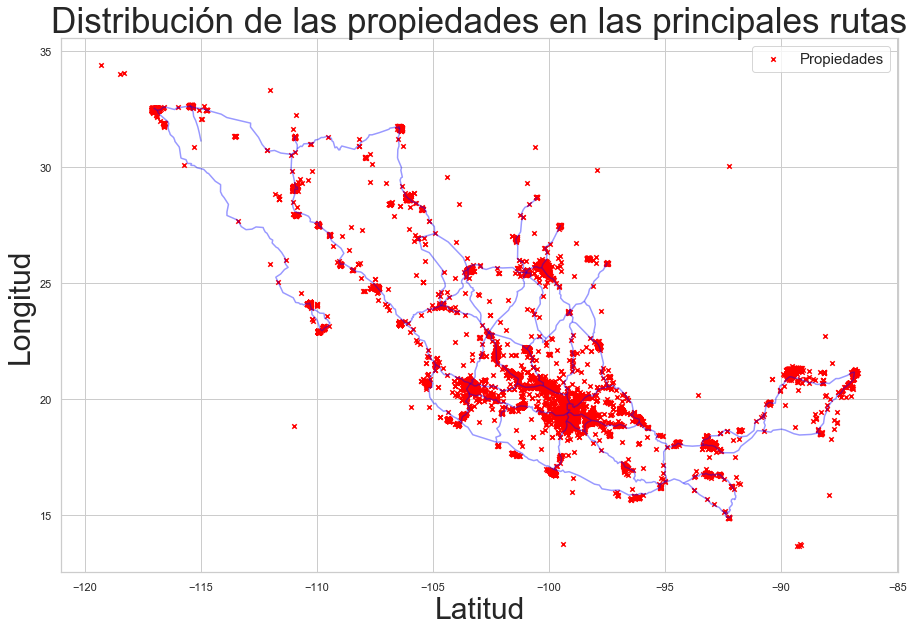

In [14]:
fig, ax = plt.subplots(figsize = (15,15))
mapa.plot(ax = ax, alpha = 0.4, color="blue")
geo_df.plot(ax = ax, markersize = 20, color = "red", marker = "x", label = "Propiedades")
plt.legend(prop={'size': 15})
ax.set_title(u"Distribución de las propiedades en las principales rutas", fontsize=35)
ax.set_xlabel(u"Latitud",fontsize=30)
ax.set_ylabel(u"Longitud", fontsize=30)

<span style="font-size:15px">3.2 - ¿Cuáles son los estados con mayor cantidad de propiedades?</span><br />


Text(0,0.5,u'Ciudad')

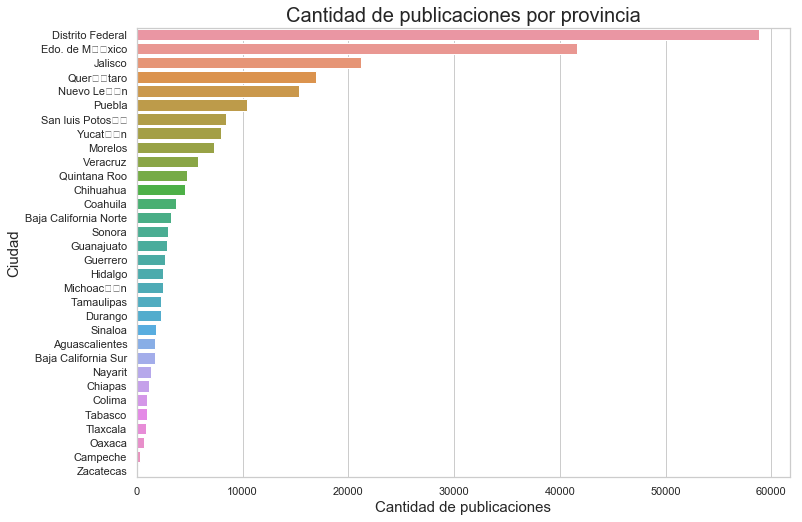

In [19]:
#Graficamos la cantidad de publicaciones por provinciO
provincias_grafico_data = datos_principales['provincia'].value_counts()

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g = sns.barplot(x=provincias_grafico_data.values, y=provincias_grafico_data.index, orient='h')
g.set_title(u"Cantidad de publicaciones por provincia", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

<span style="font-size:15px">3.3 - ¿Cómo se distribuyen las propiedades en México DF?</span><br />


Text(0,0.5,u'Ciudad')

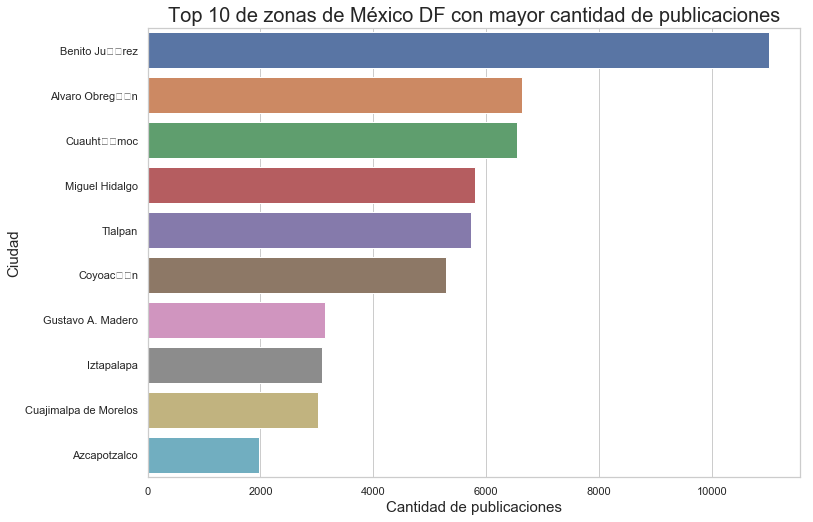

In [21]:
#Para las 5 ciudades con mayor cantidad de publicaciones, analiazamos el TOP 10 de ciudades con mayor cantidad de publicaciones
#Graficamos para ciudad de mexico el TOP 10 de las zonas o barrios con mayor cantidad de publicaciones
ciudades_df_grafico_data = datos_principales.loc[datos_principales['provincia'] == 'Distrito Federal']
ciudades_df_grafico_data = ciudades_df_grafico_data['ciudad'].value_counts()[:10]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g = sns.barplot(x=ciudades_df_grafico_data.values, y=ciudades_df_grafico_data.index, orient='h')
g.set_title(u"Top 10 de zonas de México DF con mayor cantidad de publicaciones", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

<span style="font-size:15px">3.4 - ¿Cómo se distribuyen las propiedades Edo. de México?</span><br />


Text(0,0.5,u'Ciudad')

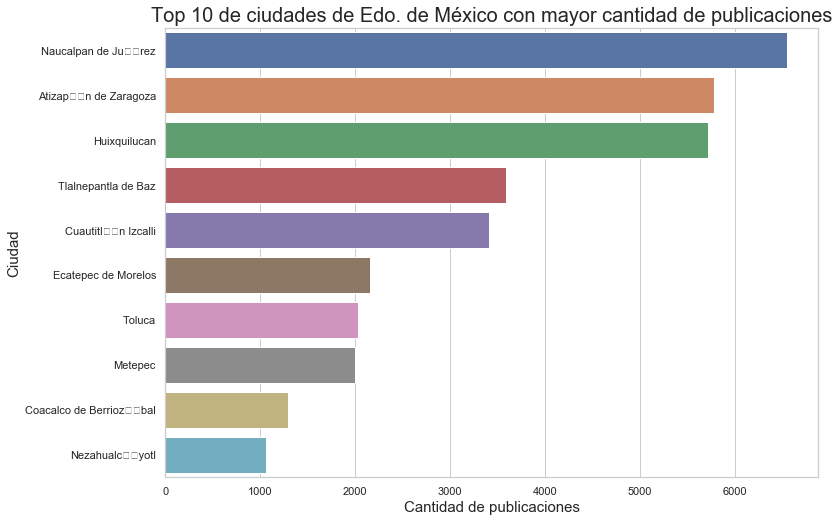

In [22]:
#Graficamos para estado de mexico el TOP 10 de las ciudades con mayor cantidad de publicaciones
ciudades_edo_grafico_data = datos_principales.loc[datos_principales['provincia'] == 'Edo. de México']
ciudades_edo_grafico_data = ciudades_edo_grafico_data['ciudad'].value_counts()[:10]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g = sns.barplot(x=ciudades_edo_grafico_data.values, y=ciudades_edo_grafico_data.index, orient='h')
g.set_title(u"Top 10 de ciudades de Edo. de México con mayor cantidad de publicaciones", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

<span style="font-size:15px">3.5 - ¿Cómo se distribuyen las propiedas en Jalisco?</span><br />


Text(0,0.5,u'Ciudad')

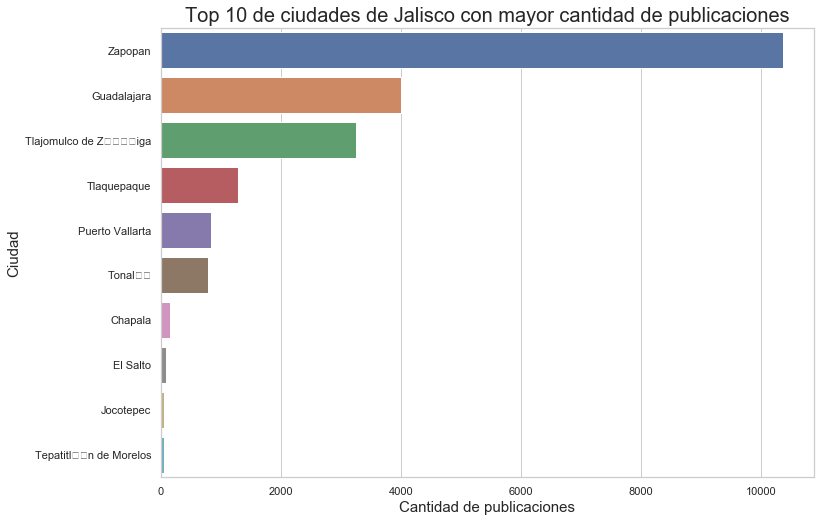

In [23]:
#Graficamos para estado de Jalisco el TOP 10 de las ciudades con mayor cantidad de publicaciones
ciudades_Jalisco_grafico_data = datos_principales.loc[datos_principales['provincia'] == 'Jalisco']
ciudades_Jalisco_grafico_data = ciudades_Jalisco_grafico_data['ciudad'].value_counts()[:10]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g = sns.barplot(x=ciudades_Jalisco_grafico_data.values, y=ciudades_Jalisco_grafico_data.index, orient='h')
g.set_title(u"Top 10 de ciudades de Jalisco con mayor cantidad de publicaciones", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

<span style="font-size:15px">3.6 - ¿Cómo se distribuyen las propiedas en Querétaro?</span><br />


Text(0,0.5,u'Ciudad')

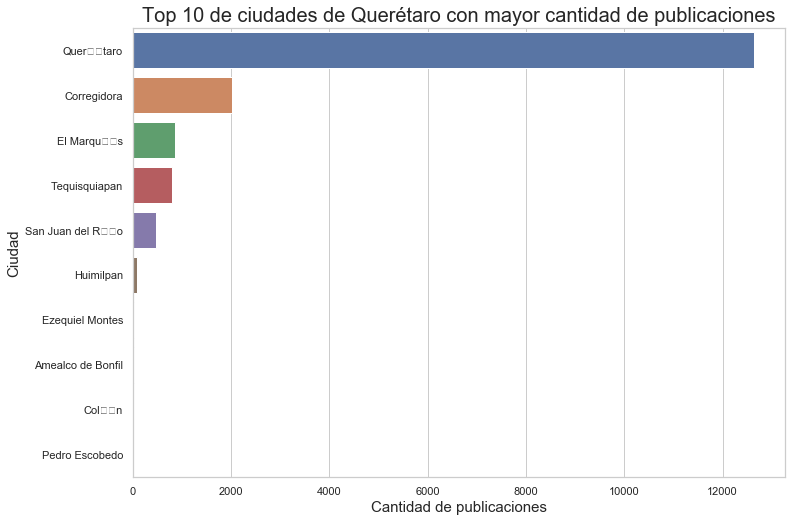

In [24]:
#Graficamos para Querétaro el TOP 10 de las ciudades con mayor cantidad de publicaciones
ciudades_Queretaro_grafico_data = datos_principales.loc[datos_principales['provincia'] == 'Querétaro']
ciudades_Queretaro_grafico_data = ciudades_Queretaro_grafico_data['ciudad'].value_counts()[:10]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g = sns.barplot(x=ciudades_Queretaro_grafico_data.values, y=ciudades_Queretaro_grafico_data.index, orient='h')
g.set_title(u"Top 10 de ciudades de Querétaro con mayor cantidad de publicaciones", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

<span style="font-size:15px">3.7 - ¿Cómo se distribuyen las propiedas en Nuevo León?</span><br />


Text(0,0.5,u'Ciudad')

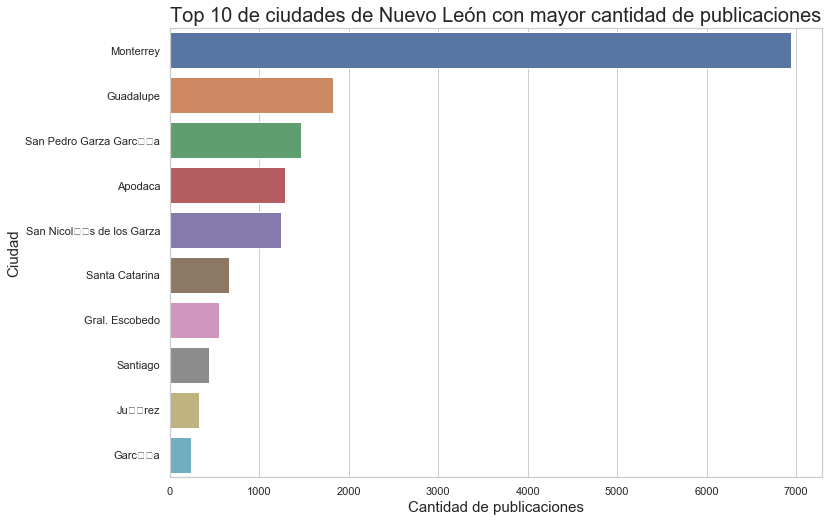

In [25]:
#Graficamos para Nuevo León el TOP 10 de las ciudades con mayor cantidad de publicaciones
ciudades_Nuevo_Leon_grafico_data = datos_principales.loc[datos_principales['provincia'] == 'Nuevo León']
ciudades_Nuevo_Leon_grafico_data = ciudades_Nuevo_Leon_grafico_data['ciudad'].value_counts()[:10]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g = sns.barplot(x=ciudades_Nuevo_Leon_grafico_data.values, y=ciudades_Nuevo_Leon_grafico_data.index, orient='h')
g.set_title(u"Top 10 de ciudades de Nuevo León con mayor cantidad de publicaciones", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

<span style="font-size:15px">3.8 - ¿Cómo se distribuyen las propiedas en Puebla?</span><br />


Text(0,0.5,u'Ciudad')

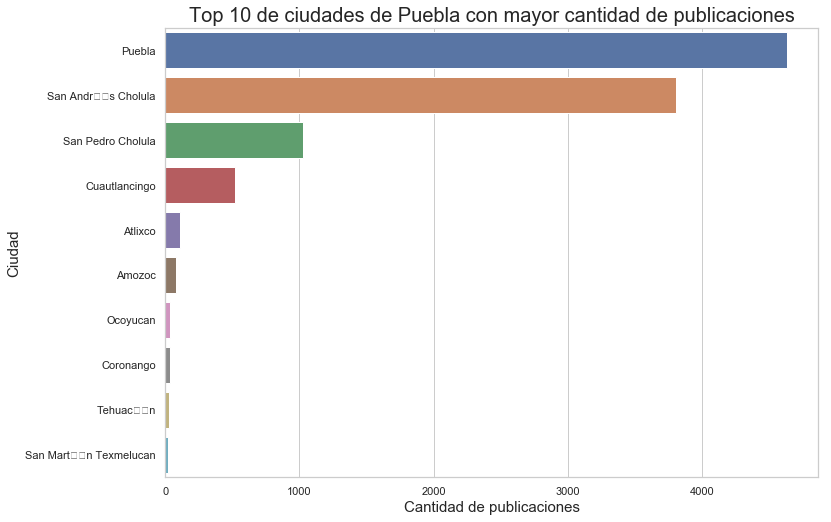

In [26]:
#Graficamos para Puebla el TOP 10 de las ciudades con mayor cantidad de publicaciones
ciudades_Nuevo_Puebla_grafico_data = datos_principales.loc[datos_principales['provincia'] == 'Puebla']
ciudades_Nuevo_Puebla_grafico_data = ciudades_Nuevo_Puebla_grafico_data['ciudad'].value_counts()[:10]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g = sns.barplot(x=ciudades_Nuevo_Puebla_grafico_data.values, y=ciudades_Nuevo_Puebla_grafico_data.index, orient='h')
g.set_title(u"Top 10 de ciudades de Puebla con mayor cantidad de publicaciones", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

<span style="font-size:15px">3.9 - ¿Cuáles son, para todo el territorio, las ciudades con mayor cantidad de propiedades?</span>


Text(0,0.5,u'Ciudad')

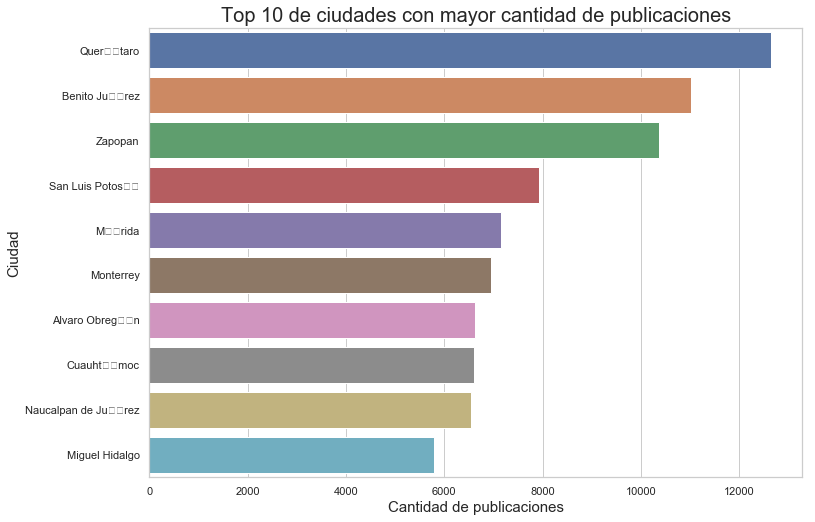

In [27]:
#Graficamos el TOP 10 de cantidad de publicaciones por ciudad
ciudades_grafico_data = datos_principales['ciudad'].value_counts()[:10]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g = sns.barplot(x=ciudades_grafico_data.values, y=ciudades_grafico_data.index, orient='h')
g.set_title(u"Top 10 de ciudades con mayor cantidad de publicaciones", fontsize=20)
g.set_xlabel(u"Cantidad de publicaciones", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

# <span style="font-size:18px">4 - Análisis sobre los precios de las propiedades</span>


<span style="font-size:15px">4.1 - ¿Cuál fue la evolución del precio promedio de las propiedades en el tiempo?</span><br />


In [32]:
#Pasamos a datetime la columna de fecha, para tomar los años. La guadamos en una columna nueva.
datos_principales['fecha_datetime'] = pd.to_datetime(datos_principales['fecha'])
datos_principales['anio'] = datos_principales['fecha_datetime'].dt.year

#Creamos una columna string con el año, para que no aparezca con decimales en el gráfico
#Inicializamos con una 'X' la columna nueva para el año
datos_principales['anio_string'] = 'X'
datos_principales.loc[datos_principales.anio == 2012, 'anio_string'] = '2012'
datos_principales.loc[datos_principales.anio == 2013, 'anio_string'] = '2013'
datos_principales.loc[datos_principales.anio == 2014, 'anio_string'] = '2014'
datos_principales.loc[datos_principales.anio == 2015, 'anio_string'] = '2015'
datos_principales.loc[datos_principales.anio == 2016, 'anio_string'] = '2016'

#Construimos un dataframe auxiliar con las columnas que necesitamos para hacer el análisis
#Hacemos el group by, calculamos la media del precio
precio_promedio_anio = datos_principales[['anio_string','precio']].groupby('anio_string').mean().reset_index()


Text(0,0.5,'Precio promedio')

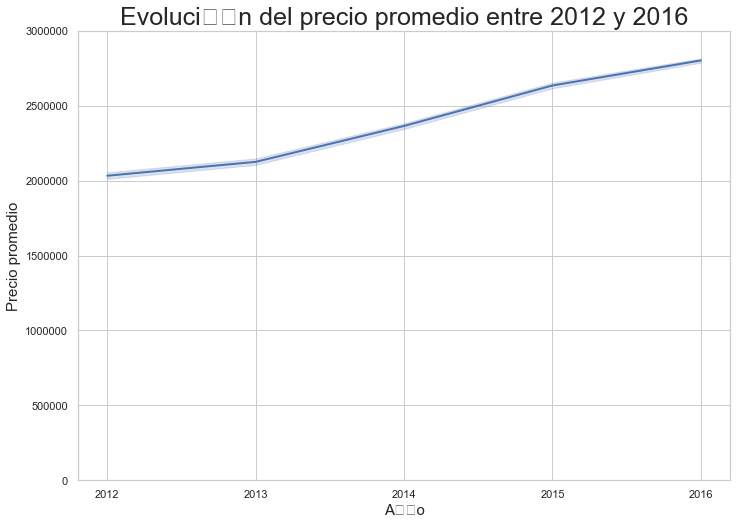

In [36]:
#Mismo que el anterior, pero sin groupby y promedio
#Construimos un dataframe auxiliar con las columnas que necesitamos para hacer el análisis
precio_promedio_anio2 = datos_principales[['anio_string','precio']]

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
#Graficamos la evolución del precio promedio en el período 2012-2016 
sns.lineplot(x="anio_string", y="precio", data=precio_promedio_anio2)
ax = plt.gca()
ax.set_ylim(ymin=0)
ax.set_ylim(ymax=3000000)
ax.lines[0].set_linestyle("-")
ax.lines[0].set_linewidth(2)
ax.set_title("Evolución del precio promedio entre 2012 y 2016", fontsize=25)
ax.set_xlabel("Año",fontsize=15)
ax.set_ylabel("Precio promedio", fontsize=15)

<span style="font-size:15px">4.2 - ¿Cuál fue la evolución del precio promedio de las propiedades por estado?</span><br />


In [34]:
#Construimos un dataframe auxiliar con las columnas que necesitamos para hacer el análisis
precio_promedio_provincia_anio = datos_principales[['anio_string','provincia','precio']]
precio_promedio_provincia_anio = precio_promedio_provincia_anio.loc[(precio_promedio_provincia_anio["provincia"] == 'Distrito Federal') | 
                                                                    (precio_promedio_provincia_anio["provincia"] == 'Edo. de México') | 
                                                                    (precio_promedio_provincia_anio["provincia"] == 'Jalisco') |
                                                                    (precio_promedio_provincia_anio["provincia"] == 'Querétaro') |
                                                                    (precio_promedio_provincia_anio["provincia"] == 'Nuevo León') |
                                                                    (precio_promedio_provincia_anio["provincia"] == 'Puebla') 
                                                                    ,:]

Text(0,0.5,'Precio promedio')

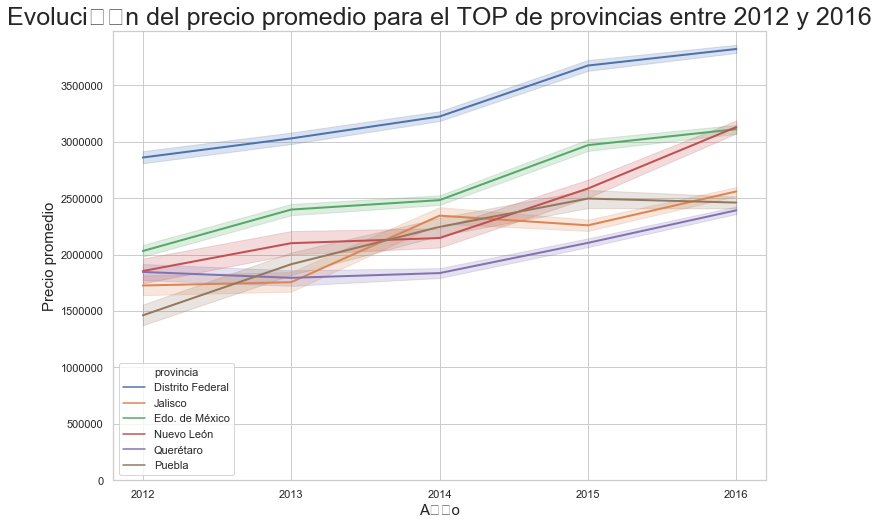

In [37]:
#Graficamos la evolución del precio promedio por provincia en el período 2012-2016 
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.lineplot(x="anio_string", y="precio", hue="provincia", style="provincia", dashes=False, data=precio_promedio_provincia_anio)
ax = plt.gca()
ax.set_ylim(ymin=0)
for i in range(6):
    ax.lines[i].set_linestyle("-")
    ax.lines[i].set_linewidth(2)
ax.set_title("Evolución del precio promedio para el TOP de provincias entre 2012 y 2016", fontsize=25)
ax.set_xlabel("Año",fontsize=15)
ax.set_ylabel("Precio promedio", fontsize=15)

<span style="font-size:15px">4.3 - ¿Cuál fue la evolución del precio promedio de las propiedades por ciudad?</span><br />

In [81]:
df2 = datos_principales[['ciudad','precio','anio_nombre']]
asdasd = df2.loc[(df2["ciudad"] == 'Querétaro') | (df2["ciudad"] == 'Benito Juárez') | (df2["ciudad"] == 'Zapopan') | (df2["ciudad"] == 'San Luis Potosí') | (df2["ciudad"] == 'Mérida'),:]
asdasd.loc[asdasd.ciudad.str.contains('Querétaro', na=False), 'ciudad'] = 'Queretaro'
asdasd.loc[asdasd.ciudad.str.contains('Benito Juárez', na=False), 'ciudad'] = 'Benito Juarez'
asdasd.loc[asdasd.ciudad.str.contains('San Luis Potosí', na=False), 'ciudad'] = 'San Luis Potosi'
asdasd.loc[asdasd.ciudad.str.contains('Mérida', na=False), 'ciudad'] = 'Merida'

Text(0,0.5,u'Precio')

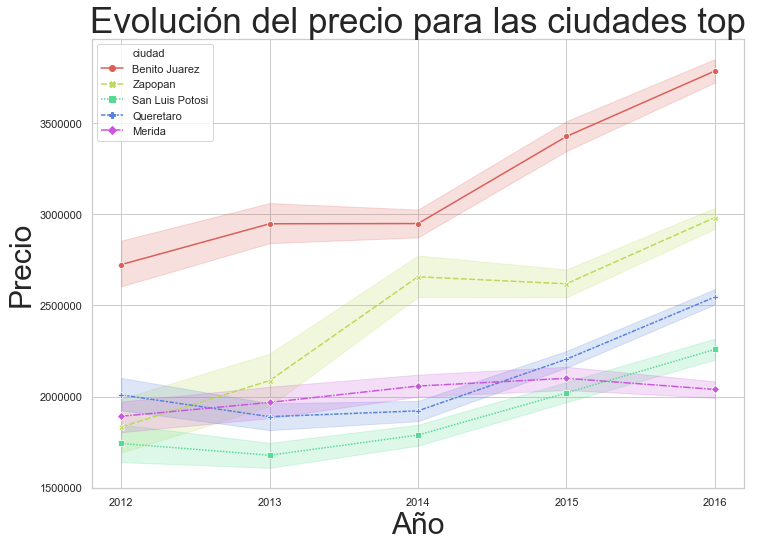

In [82]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) 
sns.lineplot(x="anio_nombre", y="precio", 
hue="ciudad", style="ciudad", markers=True, data=asdasd, 
palette=sns.color_palette("hls", len(asdasd['ciudad'].unique())));
ax = plt.gca()
ax.set_title(u"Evolución del precio para las ciudades top", fontsize=35)
ax.set_xlabel(u"Año",fontsize=30)
ax.set_ylabel(u"Precio", fontsize=30)

<span style="font-size:15px">4.4 - ¿Cuál fue la evolución del precio promedio por zona de México DF?</span><br />


In [38]:
#Para la provincia con mas pubicaciones, y con mayor aumento, vemos la evolución de precios por ciudad (en este caso zona)
#Construimos un dataframe auxiliar con las columnas que necesitamos para hacer el análisis
precio_promedio_df_anio = datos_principales[['anio_string','ciudad','precio']]

precio_promedio_df_anio = precio_promedio_df_anio.loc[(precio_promedio_df_anio["ciudad"] == 'Benito Juárez') | 
                                                                    (precio_promedio_df_anio["ciudad"] == 'Alvaro Obregón') | 
                                                                    (precio_promedio_df_anio["ciudad"] == 'Cuauhtémoc') |
                                                                    (precio_promedio_df_anio["ciudad"] == 'Miguel Hidalgo') |
                                                                    (precio_promedio_df_anio["ciudad"] == 'Tlalpan') |
                                                                    (precio_promedio_df_anio["ciudad"] == 'Coyoacán') 
                                                                    ,:]

Text(0,0.5,'Precio promedio')

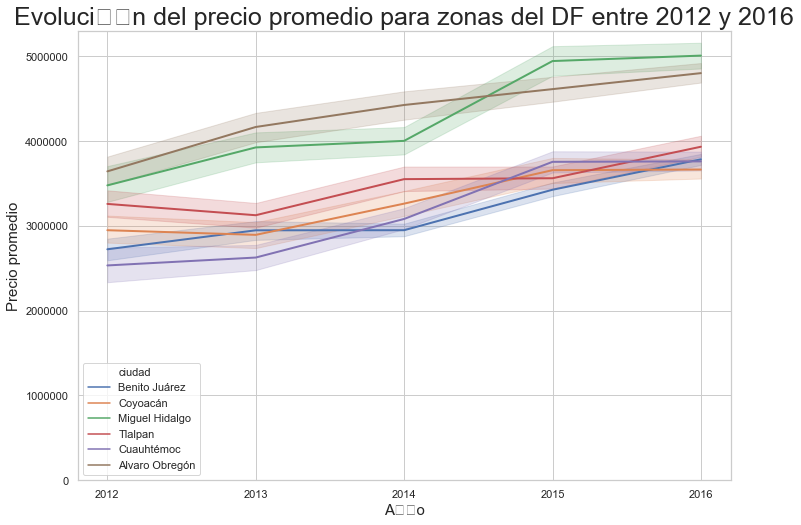

In [39]:
#Graficamos la evolución del precio promedio por zona del DF en el período 2012-2016
#El mismo análisis pude hacerse para las otras provincias - vale la pena?
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.lineplot(x="anio_string", y="precio", hue="ciudad", style="ciudad", dashes=False, data=precio_promedio_df_anio)
ax = plt.gca()
ax.set_ylim(ymin=0)
for i in range(6):
    ax.lines[i].set_linestyle("-")
    ax.lines[i].set_linewidth(2)
ax.set_title("Evolución del precio promedio para zonas del DF entre 2012 y 2016", fontsize=25)
ax.set_xlabel("Año",fontsize=15)
ax.set_ylabel("Precio promedio", fontsize=15)

<span style="font-size:15px">4.5 - ¿Cuál fue la evolución del precio promedio por tipo de propiedad?</span><br />


In [43]:
#Para las propiedades clasificadas por tipo, vemos la evolución de precios
#Construimos un dataframe auxiliar con las columnas que necesitamos para hacer el análisis
precio_promedio_tipo_anio = datos_principales[['anio_string','tipodepropiedad','precio']]
precio_promedio_tipo_anio = precio_promedio_tipo_anio.loc[(precio_promedio_tipo_anio["tipodepropiedad"] == 'Casa') | 
                                                          (precio_promedio_tipo_anio["tipodepropiedad"] == 'Apartamento') | 
                                                          (precio_promedio_tipo_anio["tipodepropiedad"] == 'Casa en condominio') |
                                                          (precio_promedio_tipo_anio["tipodepropiedad"] == 'Terreno') |
                                                          (precio_promedio_tipo_anio["tipodepropiedad"] == 'Edificio') |
                                                          (precio_promedio_tipo_anio["tipodepropiedad"] == 'Local Comercial') |
                                                          (precio_promedio_tipo_anio["tipodepropiedad"] == 'Oficina comercial') |
                                                          (precio_promedio_tipo_anio["tipodepropiedad"] == 'Bodega comercial') |
                                                          (precio_promedio_tipo_anio["tipodepropiedad"] == 'Terreno comercial') |
                                                          (precio_promedio_tipo_anio["tipodepropiedad"] == 'Casa uso de suelo')
                                                          ,:]

NameError: name 'set_ylim' is not defined

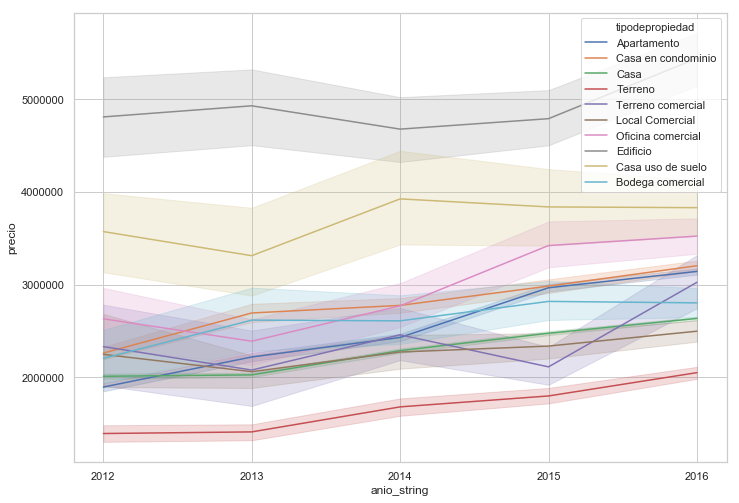

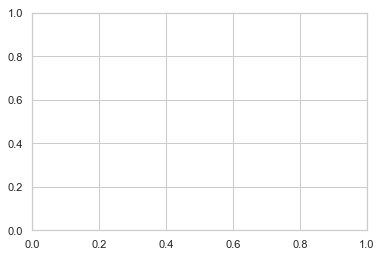

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
#Graficamos la evolución del precio promedio por tipo de propiedad en el período 2012-2016
sns.lineplot(x="anio_string", y="precio", hue="tipodepropiedad", style="tipodepropiedad", dashes=False, data=precio_promedio_tipo_anio)
ax = plt.gca()
ax.fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
set_ylim(ymin=0)
for i in range(10):
    ax.lines[i].set_linestyle("-")
    ax.lines[i].set_linewidth(2)
ax.set_title("Evolución del precio promedio para tipos de propiedades 2012 y 2016", fontsize=25)
ax.set_xlabel("Año",fontsize=15)
ax.set_ylabel("Precio promedio", fontsize=15)


<span style="font-size:15px">4.6 - ¿Varía el precio de las propiedades de acuerdo al mes de publicación?</span><br />


Text(0,0.5,u'Precio')

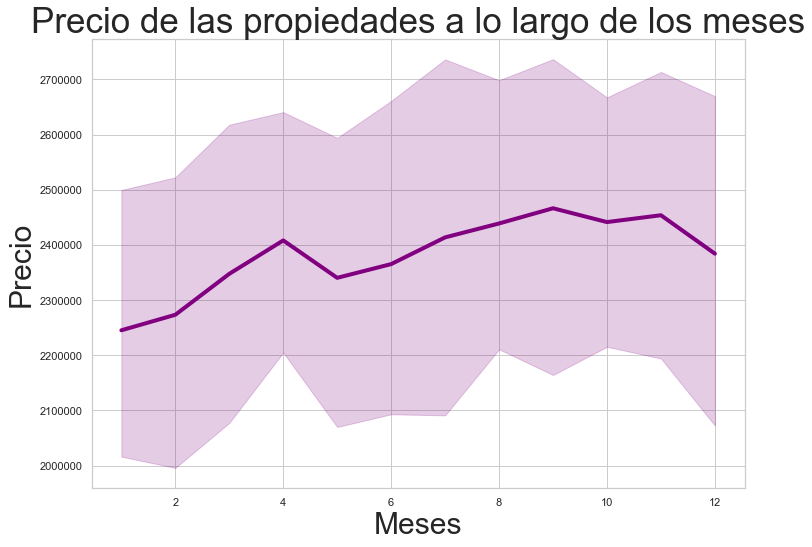

In [46]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
eventsASD = datos_principales.groupby(['anio','mes']).mean()[['precio']].reset_index()
sns.lineplot(x="mes", y="precio", data=eventsASD, markers=True, dashes=False, color='purple')
ax = plt.gca()
ax.lines[0].set_linestyle("-")
ax.lines[0].set_linewidth(4)
ax.set_title(u"Precio de las propiedades a lo largo de los meses", fontsize=35)
ax.set_xlabel(u"Meses",fontsize=30)
ax.set_ylabel(u"Precio", fontsize=30)

<span style="font-size:15px">4.7 - ¿Cuál es el precio promedio por metro cuadrado</span><br />


Text(0,0.5,'Precio')

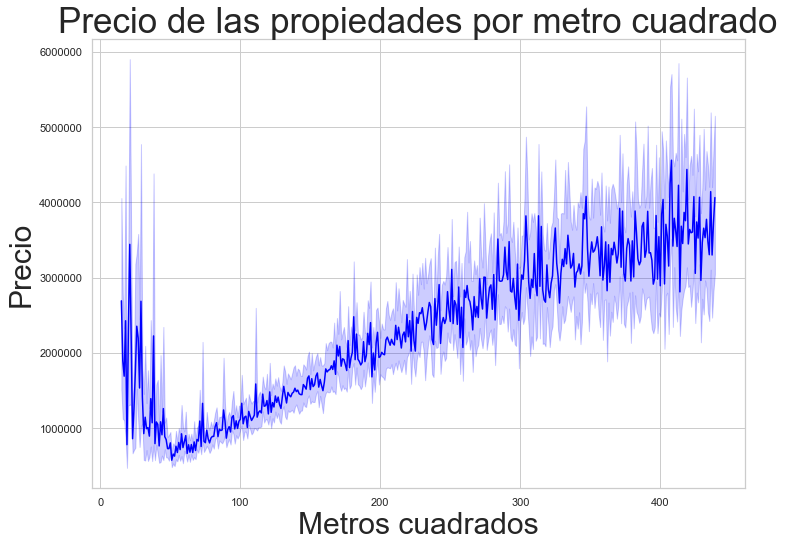

In [52]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
metrosCuadrados_df = datos_principales.groupby(['provincia','metrostotales']).mean()[['precio']].reset_index()
sns.lineplot(x="metrostotales", y="precio", data=metrosCuadrados_df, color='blue')
ax = plt.gca()
ax.set_title("Precio de las propiedades por metro cuadrado", fontsize=35)
ax.set_xlabel("Metros cuadrados",fontsize=30)
ax.set_ylabel("Precio", fontsize=30)

<span style="font-size:15px">4.8 - ¿Cuál es el precio promedio por metro cuadrado para las dos ciudades con mayor cantidad de propiedades?</span><br />


Text(0,0.5,u'Precio (en millones de pesos)')

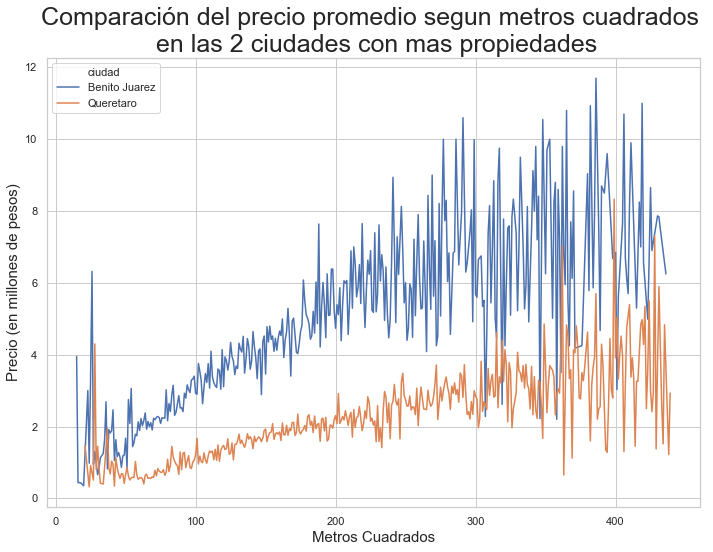

In [47]:
zonasMasPopulares = list(["Querétaro", "Benito Juárez"])
zonasPopulares = datos_principales[datos_principales['ciudad'].isin(zonasMasPopulares)]
zonasPopulares = zonasPopulares.groupby(['ciudad', 'metrostotales']).mean()[['precio']].reset_index()
zonasPopulares['precio'] = zonasPopulares['precio']/1000000
zonasPopulares.loc[zonasPopulares.ciudad.str.contains('Querétaro', na=False), 'ciudad'] = 'Queretaro'
zonasPopulares.loc[zonasPopulares.ciudad.str.contains('Benito Juárez', na=False), 'ciudad'] = 'Benito Juarez'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.lineplot(x="metrostotales", y="precio", data=zonasPopulares, hue="ciudad", color='blue')
ax = plt.gca()
ax.set_title(u"Comparación del precio promedio segun metros cuadrados \n en las 2 ciudades con mas propiedades", fontsize=25)
ax.set_xlabel(u"Metros Cuadrados",fontsize=15)
ax.set_ylabel(u"Precio (en millones de pesos)", fontsize=15)

<span style="font-size:15px">4.9 - ¿Cómo varía el precio de acuerdo a la distancia del centro de México DF?</span><br />


Text(0,0.5,'Precio (en millones de pesos)')

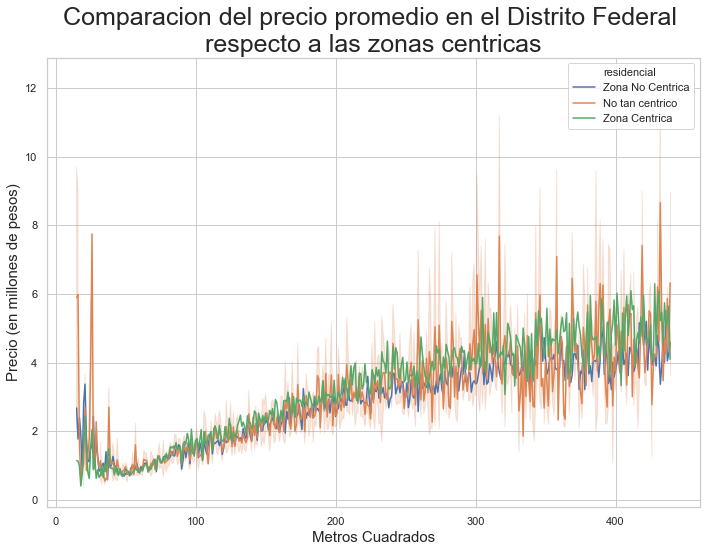

In [49]:
zonaresidencial_df = datos_principales['provincia']
zonaresidencial_df = datos_principales.loc[datos_principales['provincia'] == "Distrito Federal"]
zonaresidencial_df = datos_principales.groupby(['metrostotales','escuelascercanas', 'centroscomercialescercanos']).mean()[['precio']].reset_index()
zonaresidencial_df['ambas'] = zonaresidencial_df['escuelascercanas'] + zonaresidencial_df['centroscomercialescercanos']
zonaresidencial_df['residencial'] = 'Zona No Centrica'
zonaresidencial_df.loc[zonaresidencial_df['ambas'] == 1,'residencial'] = 'No tan centrico'
zonaresidencial_df.loc[zonaresidencial_df['ambas'] == 2,'residencial'] = 'Zona Centrica'
zonaresidencial_df['precio'] = zonaresidencial_df['precio']/1000000
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.lineplot(x="metrostotales", y="precio", data=zonaresidencial_df, hue="residencial", color='blue')
ax = plt.gca()
ax.set_title("Comparacion del precio promedio en el Distrito Federal \nrespecto a las zonas centricas", fontsize=25)
ax.set_xlabel("Metros Cuadrados",fontsize=15)
ax.set_ylabel("Precio (en millones de pesos)", fontsize=15)

<span style="font-size:15px">4.10 - ¿Cuál es el precio promedio por metro cuadrado para las zonas de México DF?</span><br />


<span style="font-size:15px">4.11 - ¿Cómo varía el precio según la cantidad de habitaciones?</span><br />


Text(0,0.5,u'Precio')

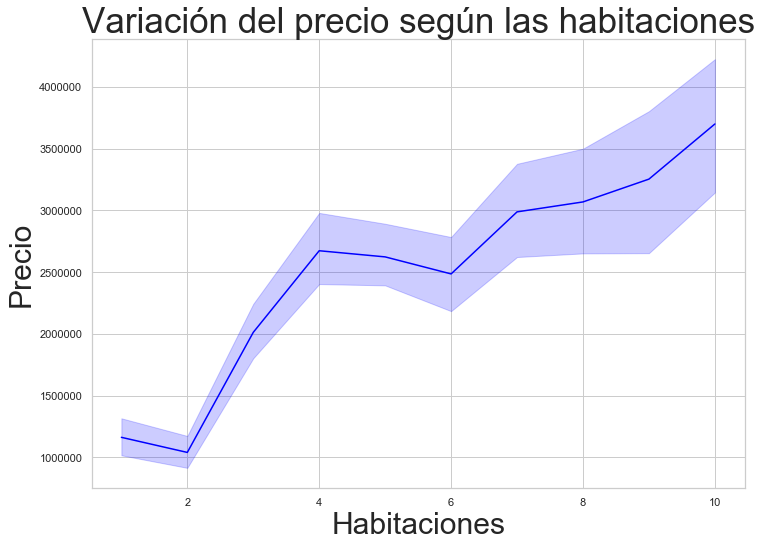

In [59]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
eventsASD = datos_principales.groupby(['provincia','habitaciones']).mean()[['precio']].reset_index()
sns.lineplot(x="habitaciones", y="precio", data=eventsASD, color='blue')
ax = plt.gca()
ax.set_title(u"Variación del precio según las habitaciones", fontsize=35)
ax.set_xlabel(u"Habitaciones",fontsize=30)
ax.set_ylabel(u"Precio", fontsize=30)

<span style="font-size:15px">4.12 - ¿Cómo varían los precios de las propiedades con y sin amenities?</span><br />


Text(0,0.5,'Precio (en millones de pesos)')

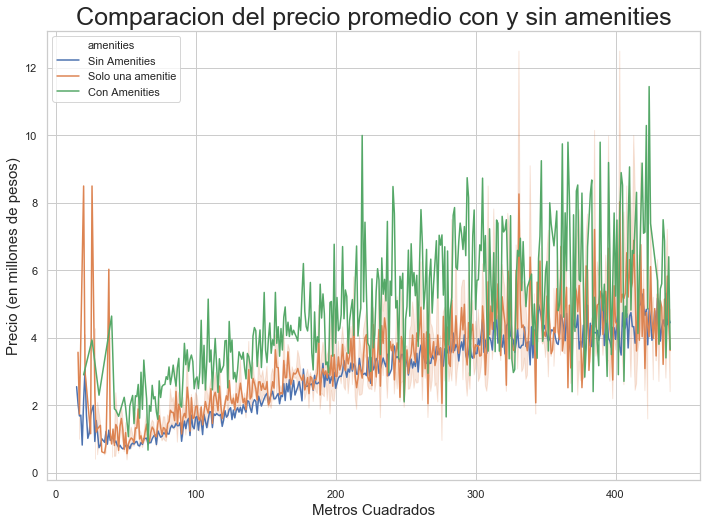

In [48]:
amenities_df = datos_principales.groupby(['metrostotales','gimnasio', 'piscina']).mean()[['precio']].reset_index()
amenities_df['ambas'] = amenities_df['gimnasio'] + amenities_df['piscina']
amenities_df['amenities'] = 'Sin Amenities'
amenities_df.loc[amenities_df['ambas'] == 1,'amenities'] = 'Solo una amenitie'
amenities_df.loc[amenities_df['ambas'] == 2,'amenities'] = 'Con Amenities'
amenities_df['precio'] = amenities_df['precio']/1000000
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.lineplot(x="metrostotales", y="precio", data=amenities_df, hue="amenities", color='blue')
ax = plt.gca()
ax.set_title("Comparacion del precio promedio con y sin amenities", fontsize=25)
ax.set_xlabel("Metros Cuadrados",fontsize=15)
ax.set_ylabel("Precio (en millones de pesos)", fontsize=15)

<span style="font-size:15px">4.13 - ¿Cómo varían los precios de las propiedades con y sin gimnasio?</span><br />


Text(0,0.5,'Precio (en millones de pesos)')

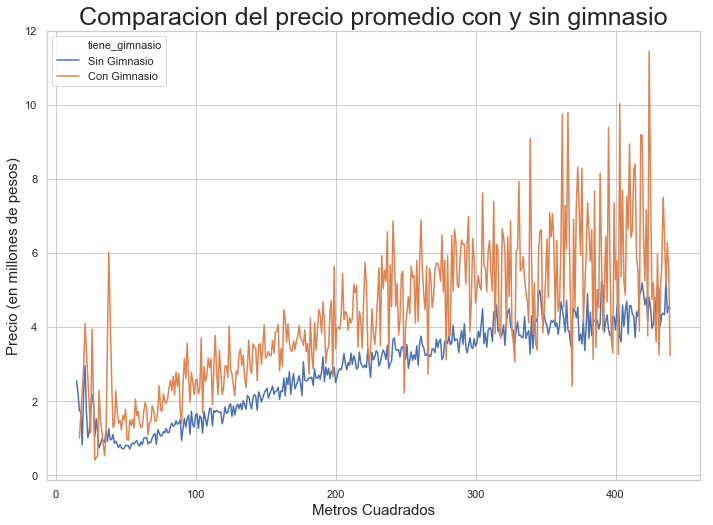

In [51]:
gimnasio_df = datos_principales.groupby(['metrostotales','gimnasio']).mean()[['precio']].reset_index()
gimnasio_df['tiene_gimnasio'] = 'Sin Gimnasio'
gimnasio_df.loc[gimnasio_df['gimnasio'] == 1,'tiene_gimnasio'] = 'Con Gimnasio'
gimnasio_df['precio'] = gimnasio_df['precio']/1000000
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.lineplot(x="metrostotales", y="precio", data=gimnasio_df, hue="tiene_gimnasio", color='blue')
ax = plt.gca()
ax.set_title("Comparacion del precio promedio con y sin gimnasio", fontsize=25)
ax.set_xlabel("Metros Cuadrados",fontsize=15)
ax.set_ylabel("Precio (en millones de pesos)", fontsize=15)

<span style="font-size:15px">4.14 - ¿Cómo varían los precios de las propiedades con y sin piscina?</span><br />

Text(0,0.5,'Precio (en millones de pesos)')

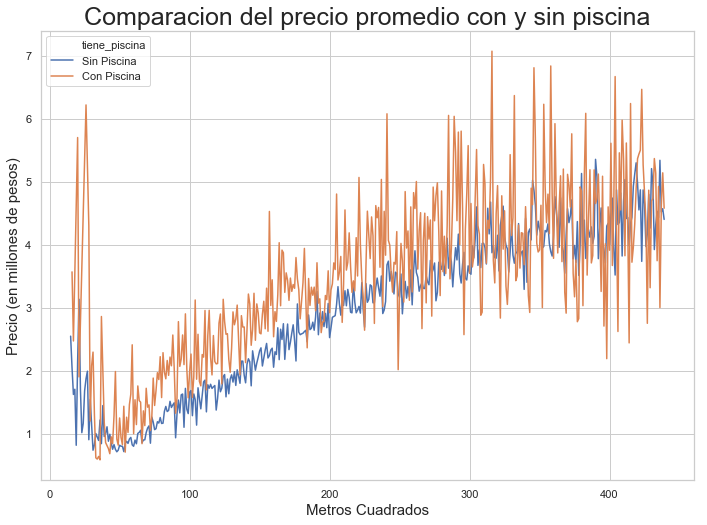

In [50]:
piscina_df = datos_principales.groupby(['metrostotales','piscina']).mean()[['precio']].reset_index()
piscina_df['tiene_piscina'] = 'Sin Piscina'
piscina_df.loc[piscina_df['piscina'] == 1,'tiene_piscina'] = 'Con Piscina'
piscina_df['precio'] = piscina_df['precio']/1000000
#Relacion metros cuadrados / precio promedio entre propiedades con y sin piscina
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.lineplot(x="metrostotales", y="precio", data=piscina_df, hue="tiene_piscina", color='blue')
ax = plt.gca()
ax.set_title("Comparacion del precio promedio con y sin piscina", fontsize=25)
ax.set_xlabel("Metros Cuadrados",fontsize=15)
ax.set_ylabel("Precio (en millones de pesos)", fontsize=15)

# <span style="font-size:18px">5 - Análisis sobre las características de las propiedades</span>

<span style="font-size:15px">5.1 - ¿Cómo se distribuyen las propiedas por tipo?</span><br />


Text(0,0.5,u'Ciudad')

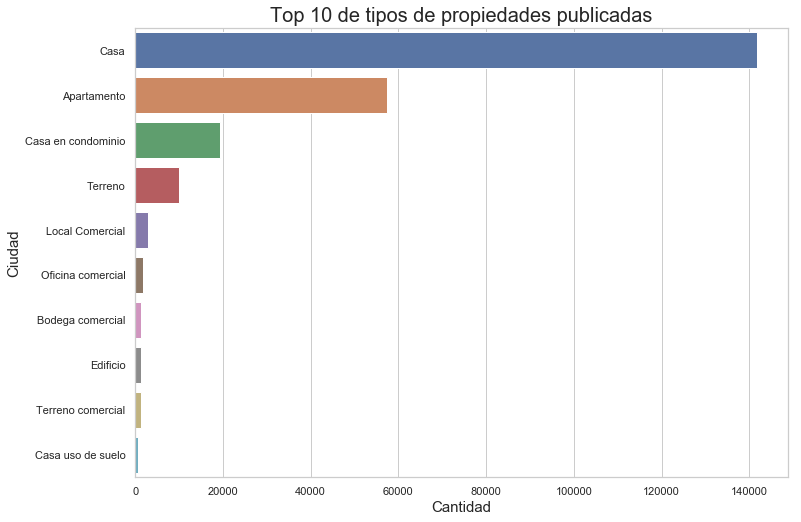

In [54]:
#Graficamos el TOP 10
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
tipo_grafico_data = datos_principales['tipodepropiedad'].value_counts()[:10]
g = sns.barplot(x=tipo_grafico_data.values, y=tipo_grafico_data.index, orient='h')
g.set_title(u"Top 10 de tipos de propiedades publicadas", fontsize=20)
g.set_xlabel(u"Cantidad", fontsize=15)
g.set_ylabel(u"Ciudad", fontsize=15)

<span style="font-size:15px">5.2 - ¿Cuál es la proporción de propiedades que cuentan con amenities?</span><br />


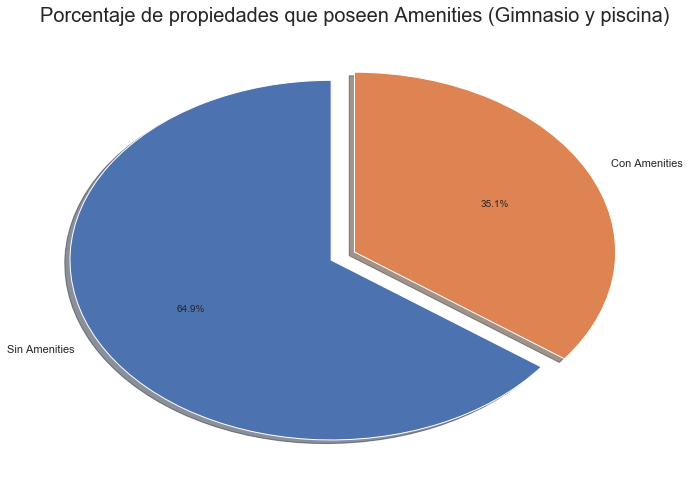

In [58]:
conAmenities = (datos_principales[datos_principales['gimnasio'] == 1])
conAmenities = (conAmenities[conAmenities['piscina'] == 1]).piscina.count()
sinAmenities = (datos_principales[datos_principales['gimnasio'] == 0])
sinAmenities = (sinAmenities[sinAmenities['piscina'] == 1]).piscina.count()
sizes = [sinAmenities, conAmenities]
nombres = ['Sin Amenities','Con Amenities']
plt.figure(figsize=(11.7, 8.27))
plt.title('Porcentaje de propiedades que poseen Amenities (Gimnasio y piscina)', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
plt.show()

<span style="font-size:15px">5.3 - ¿Cuál es la proporción de propiedades que cuentan con gimnasio?</span><br />


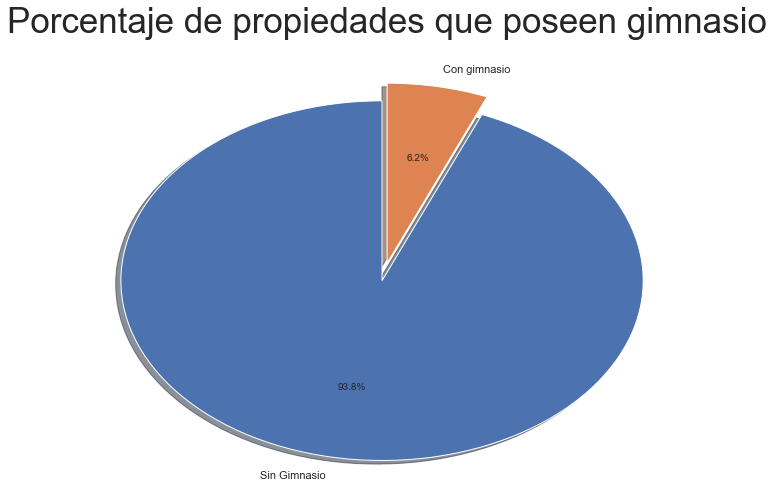

In [55]:
#Obtenemos las cantidades de propiedades con gimnasio
conGimnasio = (datos_principales[datos_principales['gimnasio'] == 1]).gimnasio.count()
sinGimnasio = (datos_principales[datos_principales['gimnasio'] == 0]).gimnasio.count()
sizes = [sinGimnasio, conGimnasio]
nombres = ['Sin Gimnasio','Con gimnasio']
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Porcentaje de propiedades que poseen gimnasio', fontsize=35)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
plt.show()

<span style="font-size:15px">5.4 - ¿Cuál es la proporción de propiedades que cuentan con piscina?</span><br />


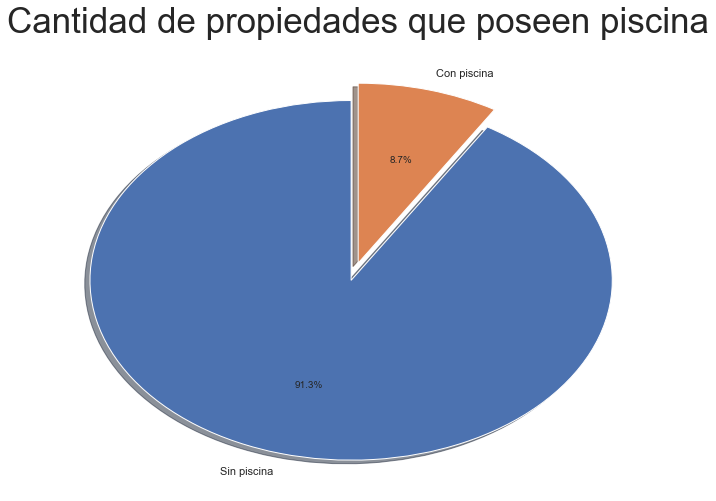

In [56]:
#Obtenemos las cantidades de propiedades con piscina
conPiscina = (datos_principales[datos_principales['piscina'] == 1]).gimnasio.count()
sinPiscina = (datos_principales[datos_principales['piscina'] == 0]).gimnasio.count()
sizes = [sinPiscina, conPiscina]
nombres = ['Sin piscina','Con piscina']
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Cantidad de propiedades que poseen piscina', fontsize=35)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
plt.show()

<span style="font-size:15px">5.5 - ¿Cómo se distribuyen las propiedades de acuerdo a la cantidad de garages que poseen?</span><br />


Text(0,0.5,'Cantidad de propiedades')

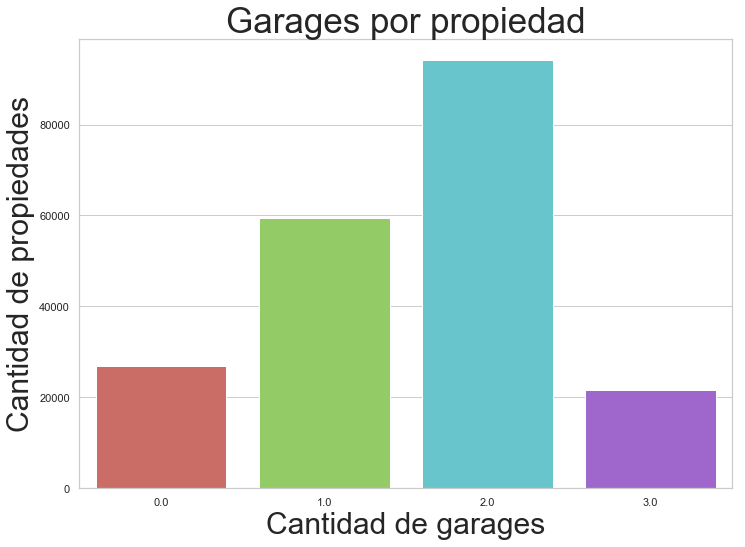

In [57]:
cantidad_de_garages_por_propiedad = list([0, 1, 2, 3])
garagesdf = datos_principales[datos_principales['garages'].isin(cantidad_de_garages_por_propiedad)]
garagesdf['garages'].value_counts()
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g = sns.countplot(x="garages", data=garagesdf, palette="hls")
g.set_title("Garages por propiedad", fontsize=35)
g.set_xlabel("Cantidad de garages", fontsize=30)
g.set_ylabel("Cantidad de propiedades", fontsize=30)

<span style="font-size:15px">5.6 - ¿Cómo se distribuyen las propiedades de acuerdo a la cantidad de habitaciones que poseen?</span><br />


<span style="font-size:15px">5.7 - ¿Cómo se distribuyen las propiedades de acuerdo a la cantidad de metros cuadrados que poseen?</span><br />


<span style="font-size:15px">5.8 - ¿Cuál es la relación entre la cantidad de habitaciones de una propiedad y su antigüedad?</span><br />


In [60]:
datos_principales['antiguedad_agrupada'] = '0'
datos_principales.loc[datos_principales.antiguedad <= 5, 'antiguedad_agrupada'] = '0'
datos_principales.loc[((datos_principales.antiguedad > 5) & (datos_principales.antiguedad <= 15)), 'antiguedad_agrupada'] = '10'
datos_principales.loc[((datos_principales.antiguedad > 15) & (datos_principales.antiguedad <= 25)), 'antiguedad_agrupada'] = '20'
datos_principales.loc[((datos_principales.antiguedad > 25) & (datos_principales.antiguedad <= 35)), 'antiguedad_agrupada'] = '30'
datos_principales.loc[((datos_principales.antiguedad > 35) & (datos_principales.antiguedad <= 45)), 'antiguedad_agrupada'] = '40'
datos_principales.loc[((datos_principales.antiguedad > 45) & (datos_principales.antiguedad <= 55)), 'antiguedad_agrupada'] = '50'
datos_principales.loc[((datos_principales.antiguedad > 55) & (datos_principales.antiguedad <= 65)), 'antiguedad_agrupada'] = '60'
datos_principales.loc[((datos_principales.antiguedad > 65) & (datos_principales.antiguedad <= 75)), 'antiguedad_agrupada'] = '70'
datos_principales.loc[((datos_principales.antiguedad > 75) & (datos_principales.antiguedad <= 85)), 'antiguedad_agrupada'] = '80'
datos_principales.loc[((datos_principales.antiguedad > 85) & (datos_principales.antiguedad <= 95)), 'antiguedad_agrupada'] = '90'
datos_principales.loc[datos_principales.antiguedad > 95, 'antiguedad_agrupada'] = '100'

Text(81.8,0.5,u'Habitaciones')

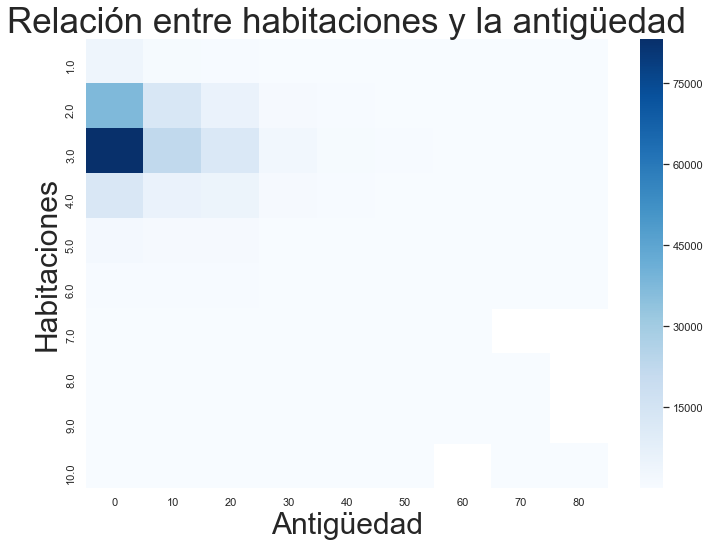

In [61]:
df_heat = datos_principales.groupby(["habitaciones", "antiguedad_agrupada"])["id"].size().reset_index()
df_heat['antiguedad_agrupada'] = pd.Categorical(df_heat['antiguedad_agrupada'], categories=['0','10','20','30','40','50', '60', '70', '80'])
df_heat.index = pd.CategoricalIndex(df_heat.index, categories= ['0','10','20','30','40','50', '60', '70', '80'])
df_heat.sortlevel(level=0, inplace=True)
for_heatmap = df_heat.pivot_table(index='habitaciones', columns='antiguedad_agrupada', values='id', aggfunc='sum')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g = sns.heatmap(for_heatmap,  cmap="Blues")
g.set_title(u"Relación entre habitaciones y la antigüedad", fontsize=35)
g.set_xlabel(u"Antigüedad",fontsize=30)
g.set_ylabel(u"Habitaciones", fontsize=30)

<span style="font-size:15px">5.9 - ¿Cúal es la relación entre la cantidad de habitaciones y el tipo de propiedad?</span>

In [62]:
datos_principales.loc[datos_principales.tipodepropiedad.str.contains('Comercial', na=False), 'tipodepropiedad'] = 'Comercio'
datos_principales.loc[datos_principales.tipodepropiedad.str.contains('Casa en condominio', na=False), 'tipodepropiedad'] = 'Condominio'
zona = datos_principales.loc[(datos_principales['tipodepropiedad'] == 'Casa') | (datos_principales['tipodepropiedad'] == 'Apartamento') | (datos_principales['tipodepropiedad'] == 'Condominio')]
zona = zona.loc[zona['habitaciones'] < 6]

Text(81.8,0.5,u'Habitaciones')

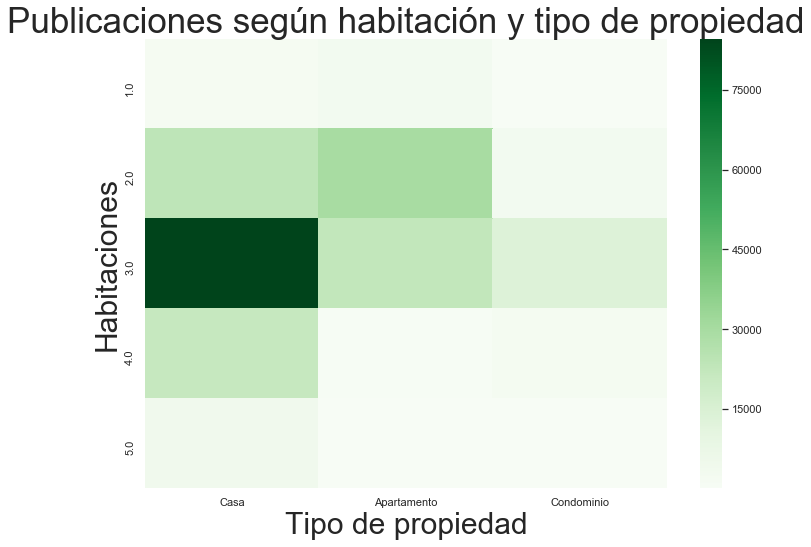

In [63]:
df_heat = zona.groupby(["habitaciones", "tipodepropiedad"])["id"].size().reset_index()
df_heat['tipodepropiedad'] = pd.Categorical(df_heat['tipodepropiedad'], categories=['Casa','Apartamento','Condominio','Terreno','Comercio'])
df_heat.index = pd.CategoricalIndex(df_heat.index, categories= ['Casa','Apartamento','Condominio','Terreno','Comercio'])
df_heat.sortlevel(level=0, inplace=True)
for_heatmap = df_heat.pivot_table(index='habitaciones', columns='tipodepropiedad', values='id', aggfunc='sum')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g = sns.heatmap(for_heatmap,  cmap="Greens")
g.set_title(u"Publicaciones según habitación y tipo de propiedad", fontsize=35)
g.set_xlabel(u"Tipo de propiedad",fontsize=30)
g.set_ylabel(u"Habitaciones", fontsize=30)

# <span style="font-size:18px">6 - Análisis sobre la actividad del sitio</span>


<span style="font-size:15px">6.1 - ¿Cuál es la cantidad de publicaciones por año?</span><br />


In [78]:
datos_principales['fecha'] = pd.to_datetime(datos_principales['fecha'], infer_datetime_format=True)
datos_principales['mes'] = datos_principales['fecha'].dt.month
datos_principales['dia'] = datos_principales['fecha'].dt.dayofweek
datos_principales['anio'] = datos_principales['fecha'].dt.year
datos_principales['anio_nombre'] = '2010'
datos_principales.loc[datos_principales.anio == 2012, 'anio_nombre'] = '2012'
datos_principales.loc[datos_principales.anio == 2013, 'anio_nombre'] = '2013'
datos_principales.loc[datos_principales.anio == 2014, 'anio_nombre'] = '2014'
datos_principales.loc[datos_principales.anio == 2015, 'anio_nombre'] = '2015'
datos_principales.loc[datos_principales.anio == 2016, 'anio_nombre'] = '2016'

Text(0,0.5,u'Precio')

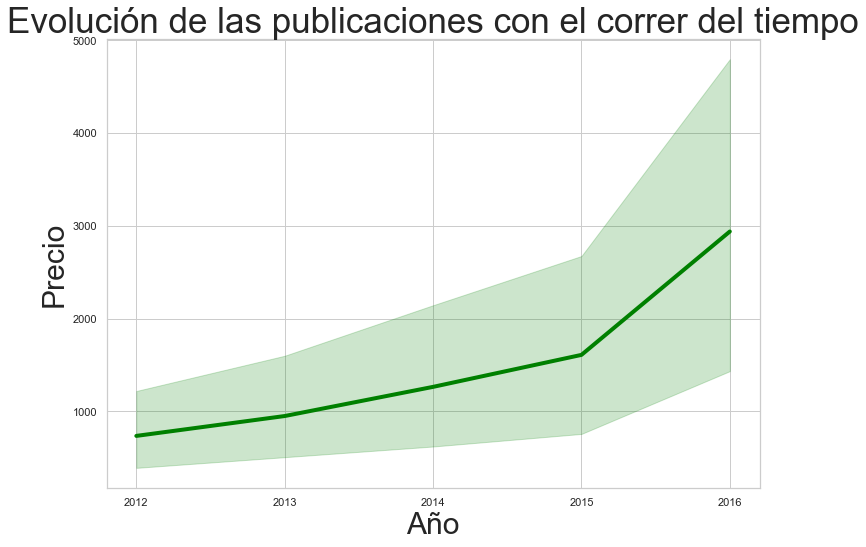

In [79]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
eventsASD = datos_principales.groupby(['provincia','anio_nombre']).count()[['precio']].reset_index()
sns.lineplot(x="anio_nombre", y="precio", data=eventsASD, color='green')
ax = plt.gca()
ax.lines[0].set_linestyle("-")
ax.lines[0].set_linewidth(4)
ax.set_title(u"Evolución de las publicaciones con el correr del tiempo", fontsize=35)
ax.set_xlabel(u"Año",fontsize=30)
ax.set_ylabel(u"Precio", fontsize=30)

<span style="font-size:15px">6.2 - ¿Cúal es el promedio de publicaciones por mes?</span><br />


Text(0,0.5,u'Precio')

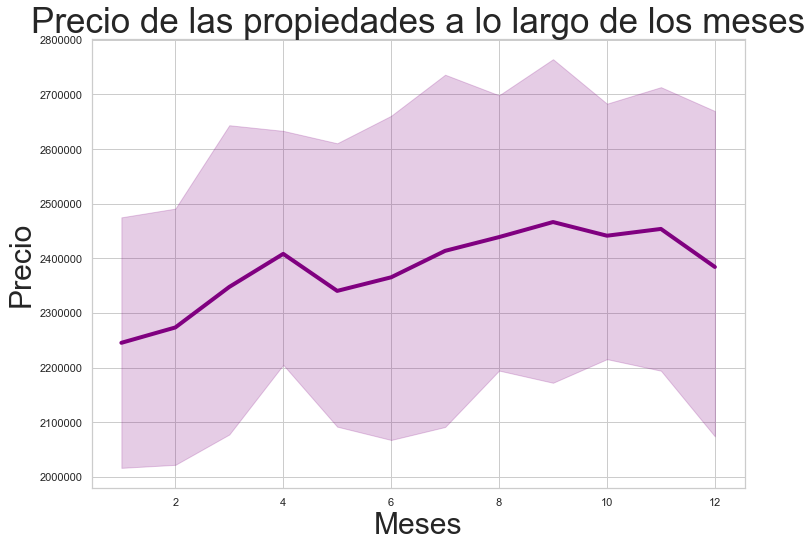

In [77]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
eventsASD = datos_principales.groupby(['anio','mes']).mean()[['precio']].reset_index()
sns.lineplot(x="mes", y="precio", data=eventsASD, markers=True, dashes=False, color='purple')
ax = plt.gca()
ax.lines[0].set_linestyle("-")
ax.lines[0].set_linewidth(4)
ax.set_title(u"Precio de las propiedades a lo largo de los meses", fontsize=35)
ax.set_xlabel(u"Meses",fontsize=30)
ax.set_ylabel(u"Precio", fontsize=30)

<span style="font-size:15px">6.3 - ¿Cúal es el promedio de publicaciones por día de la semana?</span><br />


In [75]:
datos_principales['dia_nombre'] = 'LUN'
datos_principales.loc[datos_principales.dia == 0, 'dia_nombre'] = 'DOM'
datos_principales.loc[datos_principales.dia == 1, 'dia_nombre'] = 'LUN'
datos_principales.loc[datos_principales.dia == 2, 'dia_nombre'] = 'MAR'
datos_principales.loc[datos_principales.dia == 3, 'dia_nombre'] = 'MIE'
datos_principales.loc[datos_principales.dia == 4, 'dia_nombre'] = 'JUE'
datos_principales.loc[datos_principales.dia == 5, 'dia_nombre'] = 'VIE'
datos_principales.loc[datos_principales.dia == 6, 'dia_nombre'] = 'SAB'
datos_principales['dia_nombre'] = pd.Categorical(datos_principales['dia_nombre'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])

Text(0,0.5,u'Precio')

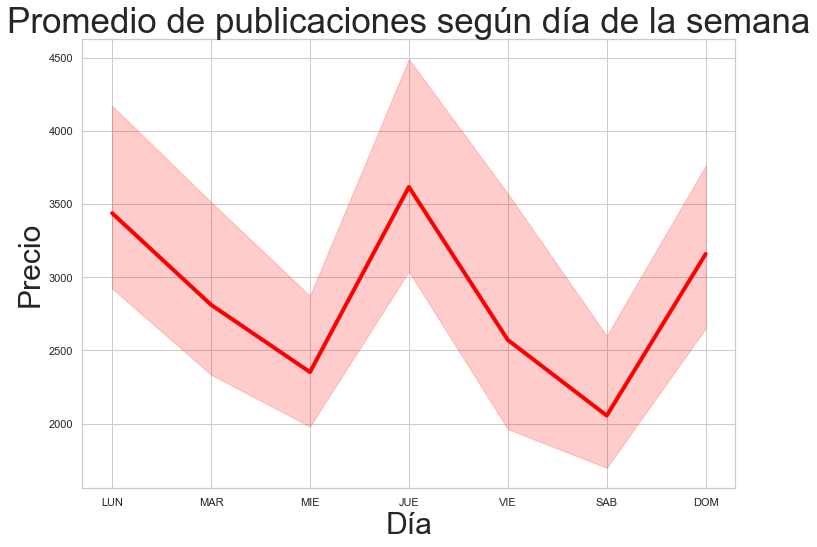

In [76]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
eventsASD = datos_principales.groupby(['mes','dia_nombre']).count()[['id']].reset_index()
sns.lineplot(x="dia_nombre", y="id", data=eventsASD, color='red')
ax = plt.gca()
ax.lines[0].set_linestyle("-")
ax.lines[0].set_linewidth(4)
ax.set_title(u"Promedio de publicaciones según día de la semana", fontsize=35)
ax.set_xlabel(u"Día",fontsize=30)
ax.set_ylabel(u"Precio", fontsize=30)

<span style="font-size:15px">6.4 - ¿Cómo fue la evolución en la cantidad de publicaciones para las ciudades TOP?</span><br />


In [71]:
df2 = datos_principales[['ciudad','precio','anio_nombre']]
asdasd = df2.loc[(df2["ciudad"] == 'Querétaro') | (df2["ciudad"] == 'Benito Juárez') | (df2["ciudad"] == 'Zapopan') | (df2["ciudad"] == 'San Luis Potosí') | (df2["ciudad"] == 'Mérida'),:]
asdasd.loc[asdasd.ciudad.str.contains('Querétaro', na=False), 'ciudad'] = 'Queretaro'
asdasd.loc[asdasd.ciudad.str.contains('Benito Juárez', na=False), 'ciudad'] = 'Benito Juarez'
asdasd.loc[asdasd.ciudad.str.contains('San Luis Potosí', na=False), 'ciudad'] = 'San Luis Potosi'
asdasd.loc[asdasd.ciudad.str.contains('Mérida', na=False), 'ciudad'] = 'Merida'

In [72]:
habitaciones = datos_principales.loc[datos_principales['habitaciones'] < 5]
df1 = habitaciones[['habitaciones','precio','anio']]
df1['anio_nombre'] = '2010'
df1.loc[df1.anio == 2012, 'anio_nombre'] = '2012'
df1.loc[df1.anio == 2013, 'anio_nombre'] = '2013'
df1.loc[df1.anio == 2014, 'anio_nombre'] = '2014'
df1.loc[df1.anio == 2015, 'anio_nombre'] = '2015'
df1.loc[df1.anio == 2016, 'anio_nombre'] = '2016'

Text(30.2812,0.5,u'Cantidad')

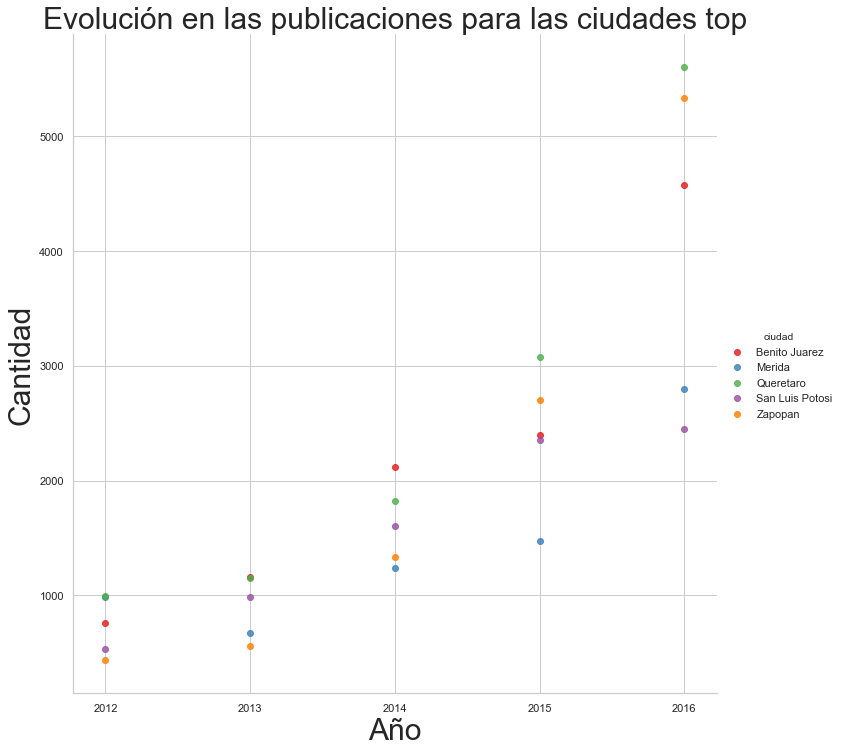

In [73]:
crecimiento_eventos = asdasd.groupby(['ciudad','anio_nombre']).count()[['precio']].reset_index()
sns.lmplot(x='anio_nombre', y='precio', hue='ciudad', data=crecimiento_eventos, fit_reg=False, size=10, palette="Set1")
ax = plt.gca()
ax.set_title(u"Evolución en las publicaciones para las ciudades top", fontsize=30)
ax.set_xlabel(u"Año",fontsize=30)
ax.set_ylabel(u"Cantidad", fontsize=30)

<span style="font-size:15px">6.5 - ¿Cómo fue la evolución en la cantidad de publicaciones de acuerdo al número de habitaciones?</span>

Text(26.79,0.5,u'Cantidad')

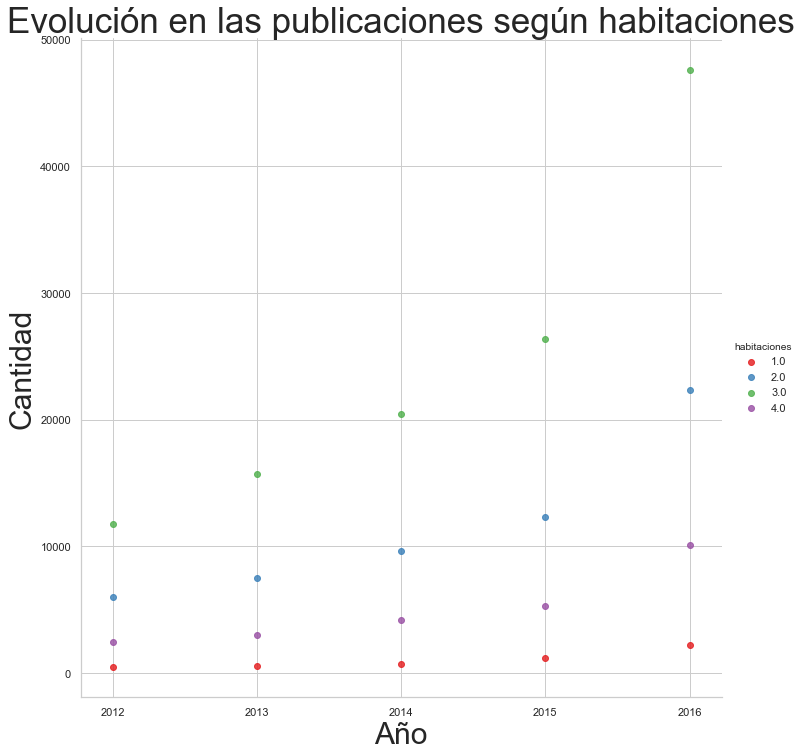

In [74]:
crecimiento_eventos = df1.groupby(['habitaciones','anio_nombre']).count()[['precio']].reset_index()
sns.lmplot(x='anio_nombre', y='precio', hue='habitaciones', data=crecimiento_eventos, fit_reg=False, size=10, palette="Set1")
ax = plt.gca()
ax.set_title(u"Evolución en las publicaciones según habitaciones", fontsize=35)
ax.set_xlabel(u"Año",fontsize=30)
ax.set_ylabel(u"Cantidad", fontsize=30)

# <span style="font-size:18px">7 - Conclusión</span>